In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub


# Dataset

## Download Dataset

In [ ]:
# Download latest version
path = kagglehub.dataset_download("rounakbanik/the-movies-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rounakbanik/the-movies-dataset/versions/7


In [ ]:
movie_dataset = pd.read_csv(path + '/movies_metadata.csv', low_memory=False)

In [ ]:
movie_dataset

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


## Describe Each Column

In [ ]:
for col in movie_dataset.columns:
  print(f"Value counts for column '{col}':")
  print(movie_dataset[col].value_counts())
  print("-" * 20)

Value counts for column 'adult':
adult
False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: count, dtype: int64
--------------------
Value counts for column 'belongs_to_collection':
belongs_to_collection
{'id': 415931, 'name': 'The Bowery Boys', 'poster_path': '/q6sA4bzMT9cK7EEmXYwt7PNrL5h.jpg', 'backdrop_path': '/foe3kuiJmg5AklhtD3skWbaTMf2.jpg'}                 2

## Drop Unuseful Columns

In [ ]:
movie_dataset = movie_dataset.drop('adult', axis=1) # unbalance ( 99% is False )
movie_dataset = movie_dataset.drop('belongs_to_collection', axis=1) # No Information
movie_dataset = movie_dataset.drop('homepage', axis=1) # No Information
movie_dataset = movie_dataset.drop('id', axis=1) # No Information
movie_dataset = movie_dataset.drop('imdb_id', axis=1) # No Information
movie_dataset = movie_dataset.drop('original_title', axis=1) # No Information
movie_dataset = movie_dataset.drop('overview', axis=1) # Not Useful for this task
movie_dataset = movie_dataset.drop('poster_path', axis=1) # No Information
movie_dataset = movie_dataset.drop('production_countries', axis=1) # Too Complicated
movie_dataset = movie_dataset.drop('tagline', axis=1) # Not Useful for this task
movie_dataset = movie_dataset.drop('video', axis=1) # unbalance ( 99% is False )
movie_dataset = movie_dataset.drop('spoken_languages', axis=1) # we keep original language
movie_dataset = movie_dataset.drop('revenue', axis=1) # No Information ( 99% is zero )

print(movie_dataset.columns)

Index(['budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'release_date', 'runtime', 'status', 'title',
       'vote_average', 'vote_count'],
      dtype='object')


## Transform Other Columns

### Transform budget column from numerical to known and unknown

In [ ]:
movie_dataset['budget']

,budget
0,30000000
1,65000000
2,0
3,16000000
4,0
...,...
45461,0
45462,0
45463,0
45464,0


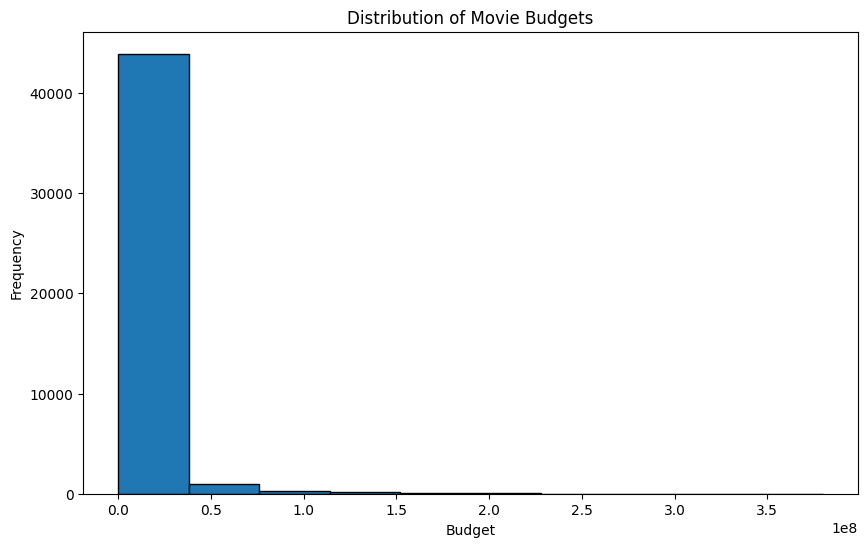

In [ ]:
movie_dataset['budget'] = pd.to_numeric(movie_dataset['budget'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(movie_dataset['budget'], bins=10, edgecolor='black')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Budgets')
plt.show()

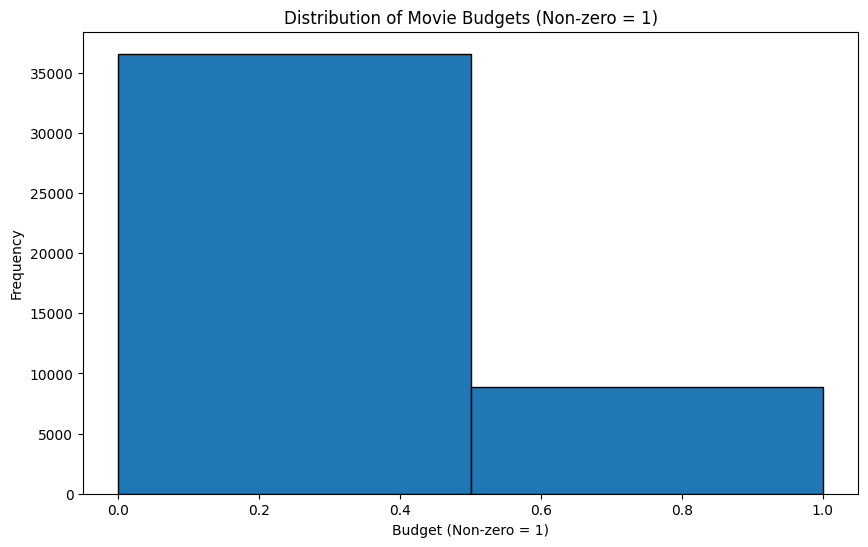

In [ ]:
# Convert non-zero budget values to 1
movie_dataset['budget'] = movie_dataset['budget'].apply(lambda x: 1 if pd.notna(x) and x != 0 else x)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(movie_dataset['budget'], bins=2, edgecolor='black')
plt.xlabel('Budget (Non-zero = 1)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Budgets (Non-zero = 1)')
plt.show()

### Keeping only first genre

In [ ]:
movie_dataset['genres']

,genres
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,"[{'id': 35, 'name': 'Comedy'}]"
...,...
45461,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n..."
45462,"[{'id': 18, 'name': 'Drama'}]"
45463,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
45464,[]


In [ ]:
# prompt: genres column is a list of json keep only the 'name' value of first element and print value counts

import ast

def get_first_genre_name(genres_str):
    try:
        genres_list = ast.literal_eval(genres_str)
        if isinstance(genres_list, list) and genres_list and isinstance(genres_list[0], dict) and 'name' in genres_list[0]:
            return genres_list[0]['name']
    except (ValueError, SyntaxError, IndexError):
        pass  # Handle cases where genres_str is not a valid list of dictionaries
    return None  # Return None if extraction fails

# Apply the function to the 'genres' column
movie_dataset['genres'] = movie_dataset['genres'].apply(get_first_genre_name)

# Print value counts
print(movie_dataset['genres'].value_counts(dropna=False))

genres
Drama                   11966
Comedy                   8820
Action                   4489
Documentary              3415
Horror                   2619
None                     2442
Crime                    1685
Thriller                 1665
Adventure                1514
Romance                  1191
Animation                1124
Fantasy                   704
Science Fiction           647
Mystery                   554
Family                    524
Music                     487
Western                   451
TV Movie                  390
War                       379
History                   279
Foreign                   118
Carousel Productions        1
Aniplex                     1
Odyssey Media               1
Name: count, dtype: int64


In [ ]:
# Drop rows with None values in the 'genres' column
movie_dataset = movie_dataset.dropna(subset=['genres'])

# Print value counts after dropping rows with None values
print(movie_dataset['genres'].value_counts(dropna=False))

genres
Drama                   11966
Comedy                   8820
Action                   4489
Documentary              3415
Horror                   2619
Crime                    1685
Thriller                 1665
Adventure                1514
Romance                  1191
Animation                1124
Fantasy                   704
Science Fiction           647
Mystery                   554
Family                    524
Music                     487
Western                   451
TV Movie                  390
War                       379
History                   279
Foreign                   118
Carousel Productions        1
Aniplex                     1
Odyssey Media               1
Name: count, dtype: int64


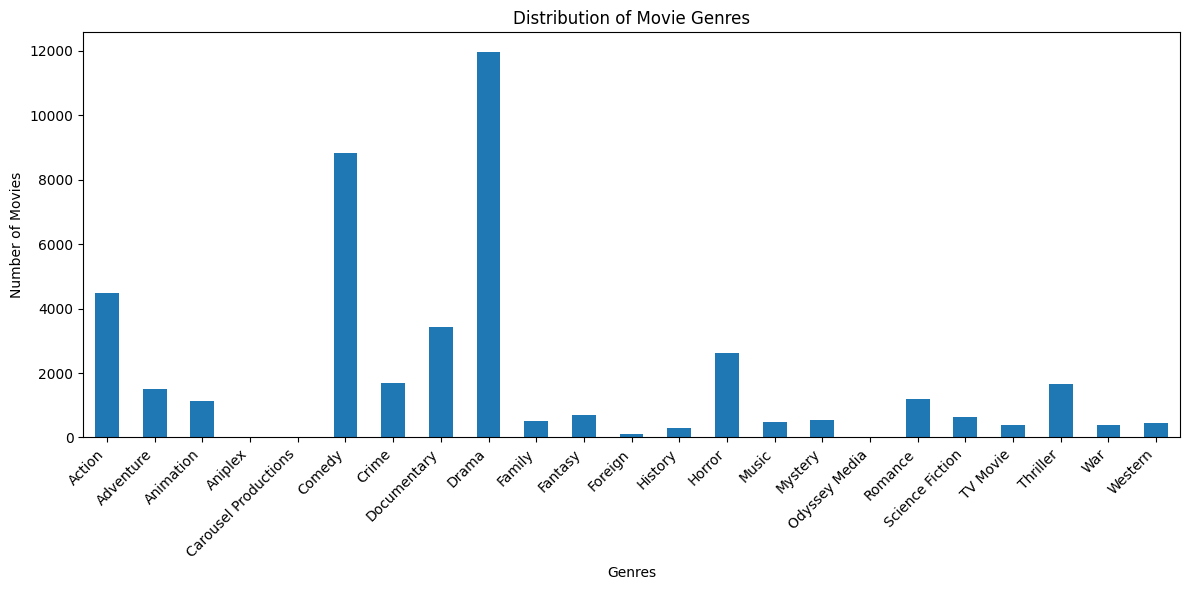

In [ ]:
genre_counts = movie_dataset['genres'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Convert original language to English and Non-English

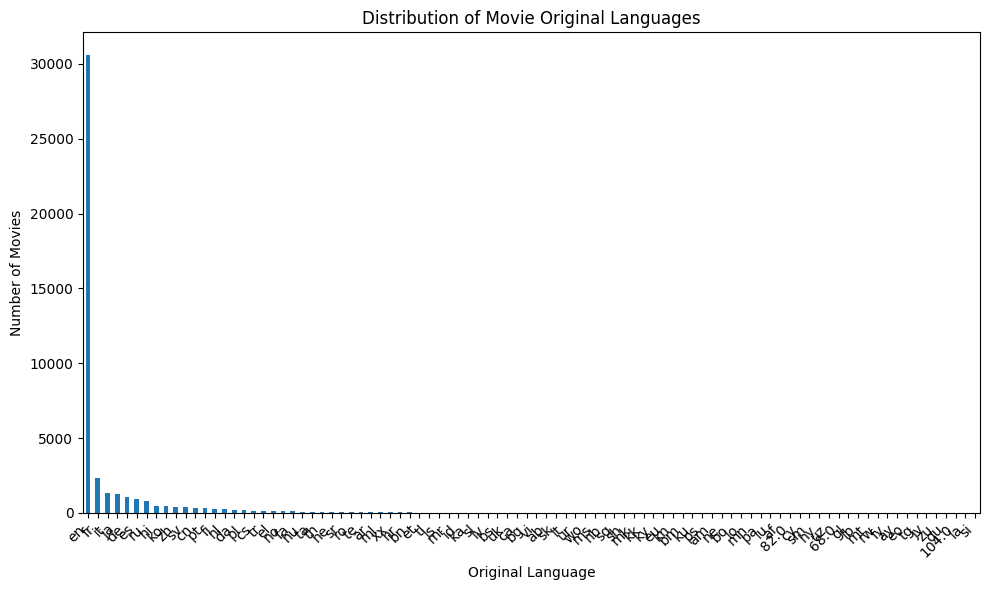

In [ ]:
# Create the histogram
plt.figure(figsize=(10, 6))
movie_dataset['original_language'].value_counts().plot(kind='bar')
plt.xlabel('Original Language')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Original Languages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

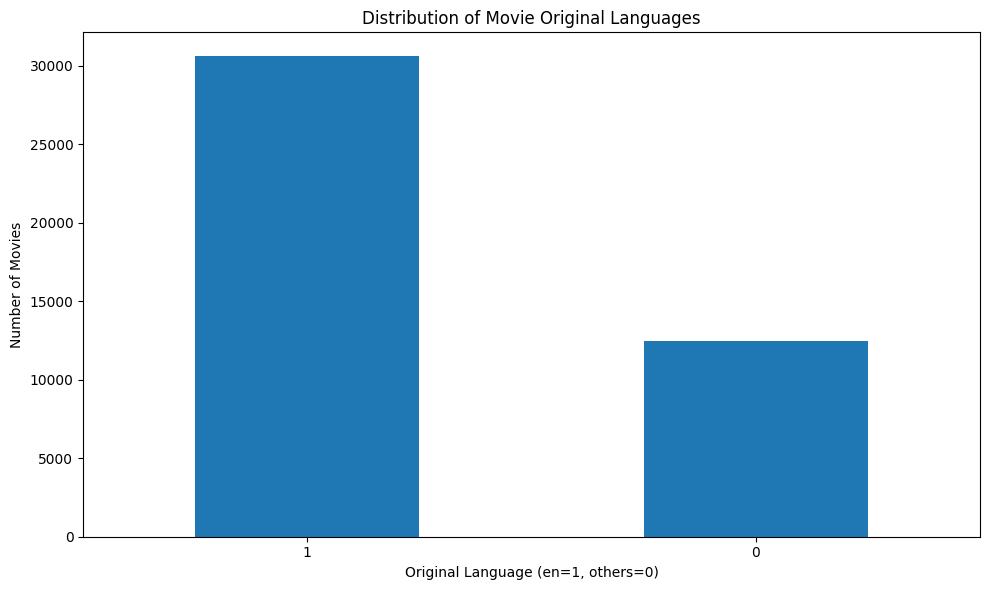

In [ ]:
# prompt: convert en to 1 and others to 0 and plot histogram

# Convert 'original_language' to 1 if 'en', otherwise 0
movie_dataset['original_language'] = movie_dataset['original_language'].apply(lambda x: 1 if x == 'en' else 0)

# Create the histogram
plt.figure(figsize=(10, 6))
movie_dataset['original_language'].value_counts().plot(kind='bar')
plt.xlabel('Original Language (en=1, others=0)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Original Languages')
plt.xticks(rotation=0)  # No rotation for better readability with 0 and 1
plt.tight_layout()
plt.show()

### Only keep released movies

In [ ]:
movie_dataset = movie_dataset[movie_dataset['status'] == 'Released']
movie_dataset['status'].value_counts()

,count
status,
Released,42630


In [ ]:
movie_dataset = movie_dataset.drop('status', axis=1)

### Transform production company to knwon and unknown

In [ ]:
# prompt: convert lists with 0 len to 0 and others to 1 in production company meta list

def process_production_companies(companies_str):
    try:
        companies_list = ast.literal_eval(companies_str)
        return 1 if len(companies_list) > 0 else 0
    except (ValueError, SyntaxError):
        return 0

movie_dataset['production_companies'] = movie_dataset['production_companies'].apply(process_production_companies)

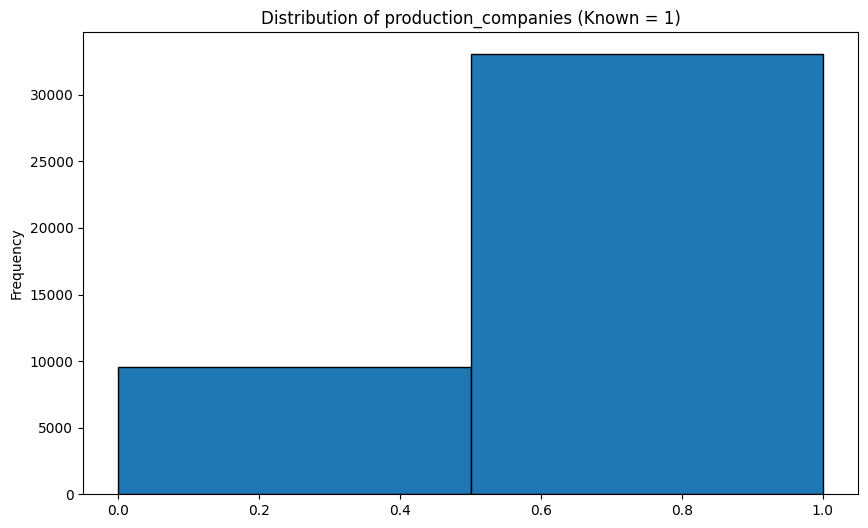

In [ ]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(movie_dataset['production_companies'], bins=2, edgecolor='black')
plt.ylabel('Frequency')
plt.title('Distribution of production_companies (Known = 1)')
plt.show()